In [25]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from os import path
from scipy.signal import find_peaks

In [1]:
datapath = "../../../Project 4--Galaxy Rotation Curve/"

In [16]:
arc = fits.open(path.join(datapath, "arcs.fits"))
arc_data = arc[0].data
arc_line = arc_data[325 // 2, :]

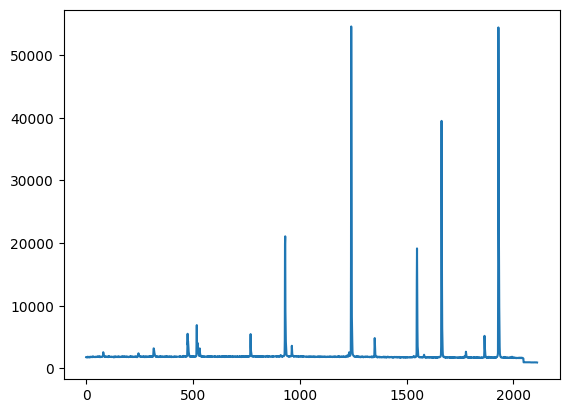

In [17]:
plt.plot(arc_line)

In [18]:
line_wavelengths = np.array([3261.05, 3403.65, 3466.55, 3610.51, 3650.15, 3888.65, 4046.56, 4077.83, 4358.33, 4471.50, 4678.16, 4799.92, 4921.93, 5015.68, 5085.82])

In [44]:
peaks, heights = find_peaks(arc_line, height=0.9*np.max(arc_line[:200]), distance=5)

In [55]:
len(peaks), len(line_wavelengths)

(18, 15)

In [56]:
peaks

array([  80,  245,  316,  475,  518,  523,  532,  770,  932,  963, 1231,
       1241, 1351, 1549, 1664, 1778, 1865, 1930])

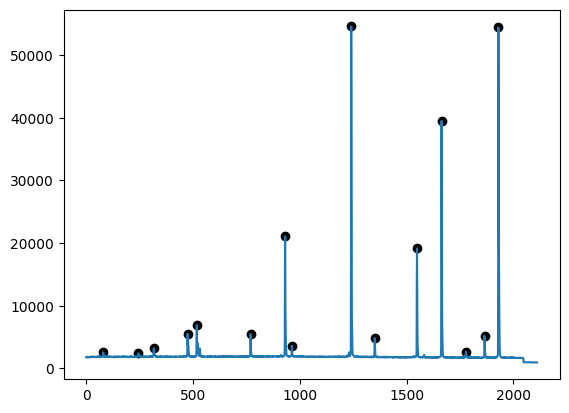

In [61]:
throw_out_inds = [5, 6, 10]
keep_inds = np.delete(np.arange(18), throw_out_inds)
assert len(throw_out_inds) == len(peaks) - len(line_wavelengths)

plt.plot(arc_line)
plt.scatter(peaks[keep_inds], heights['peak_heights'][keep_inds], color='k')

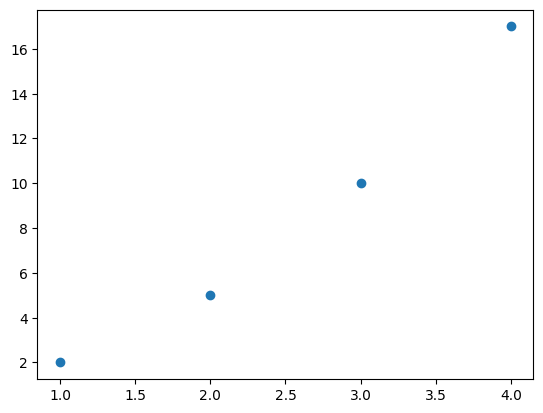

In [86]:
plt.scatter([1, 2, 3, 4], [2, 5, 10, 17])

In [93]:
peaks[-1]

1930

In [98]:
quad, slope, intercept = np.polyfit(peaks[keep_inds], line_wavelengths, 2)
idx_to_wavelength = lambda idx: quad * idx ** 2 + slope * idx + intercept
wavelengths = idx_to_wavelength(np.arange(2112))

In [103]:
quad, slope, intercept

(6.27906056438232e-05, 0.8633111261180315, 3188.272605601693)

In [99]:
solar = fits.open(path.join(datapath, "solar_spectrum.fits"))
solar_data = solar[0].data
solar_line = solar_data[325 // 2, :]

Text(0, 0.5, 'Flux at wavelength (counts)')

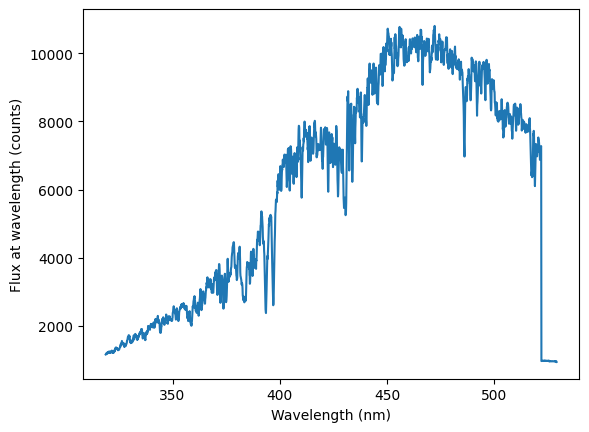

In [101]:
plt.plot(wavelengths/10, solar_line)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux at wavelength (counts)")

![img](fraunhofer.png)